# gradient 2D 시각화

No handles with labels found to put in legend.


[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]
[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]
[[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75 

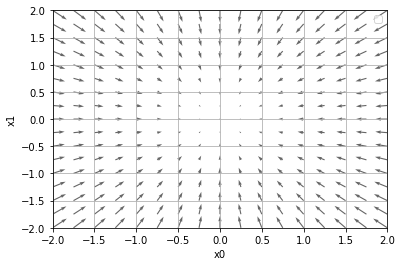

In [1]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, curr_w):
    ''' 편미분 gradient. x값이 다차원 (다항)일때. 즉, w1, w2, ..., wn. '''
    h = 1e-4 # 0.0001
    grad = np.zeros_like(curr_w) # x와 형상이 같은 배열을 생성
    
    # w1, w2, ..., wn 각각에 대한 gradient 계산
    # 결과 gradient는 grad 변수에 계산/저장
    for idx in range(curr_w.size):
        # f(x+h) 계산
        p1 = curr_w.copy()
        p1[idx] += h
        y1 = f(p1)
        
        # f(x-h) 계산
        p2 = curr_w.copy()
        p2[idx] -= h
        y2 = f(p2)
        grad[idx] = (y1 - y2) / (2*h)
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    print(x0)
    print(x1)
    X, Y = np.meshgrid(x0, x1)
    print(X)
    print(X.shape, Y.shape)
    X = X.flatten()
    Y = Y.flatten()
    print(X.shape, Y.shape)
    
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()
